# Importing libraries

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# Loading training dataset

In [89]:
dataset = pd.read_csv("data/train.csv")
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [91]:
dataset.drop('Id', axis=1,inplace=True)
dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [92]:
dataset.shape

(1460, 80)

# Deleting duplicate records

In [93]:
dataset.drop_duplicates(inplace=True)

# Checking data types

In [94]:
dataset.dtypes.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

# Numerical Features

In [95]:
numeric_columns = list(dataset.select_dtypes(include=['float64', 'int64']).columns)
numeric_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# Categorical Features

In [96]:
categorical_columns = list(dataset.select_dtypes(exclude=['float64', 'int64']).columns)
categorical_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# Finding missing values

In [97]:
dataset.isna().sum().sum()

7829

# Statistics of dataset

In [98]:
dataset.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Correlation Matrix

In [99]:
numerical_data = dataset.select_dtypes(include=['float64', 'int64'])
numerical_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


# Data Cleaning

In [100]:
# Columns

duplicated_columns = dataset.columns[dataset.columns.duplicated()]

if len(duplicated_columns >0):
    print("Duplicated columns: ", duplicated_columns)
else:
    print("No duplicate columns found")

No duplicate columns found


In [101]:
# Rows

duplicated_rows = dataset[dataset.duplicated()]

if not duplicated_rows.empty:
    print("Duplicated rows: ")
    print(duplicated_rows)
else:
    print("No duplicate row found")

No duplicate row found


# Filling missing values

In [102]:
from sklearn.impute import SimpleImputer

# Filling numerical columns having NaN with mean

numeric_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
null_numerical_columns = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
numeric_imputer.fit(dataset[null_numerical_columns])

dataset[null_numerical_columns] = numeric_imputer.transform(dataset[null_numerical_columns])

# Filling categorical columns with most frequently occuring 

In [103]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
null_catagorical_columns = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

imputer.fit(dataset[null_catagorical_columns])
dataset[null_catagorical_columns] = imputer.transform(dataset[null_catagorical_columns])

In [104]:
dataset.isnull().sum().sum()

0

# Encoding categorical data

In [106]:
dumies = pd.get_dummies(dataset[categorical_columns], drop_first=True)

dataset = pd.concat([dataset, dumies], axis=1)

dataset.drop(categorical_columns, axis=1, inplace=True)

dataset

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,False,True,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,False,True,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,False,True,False,False,False,True,False


# Plotting relationships between variables

#### SalePrice's Density

/var/folders/9w/csn11pg56mz_mqtbmcxzdc340000gn/T/ipykernel_76852/186361086.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['SalePrice'], color='green')


<Axes: xlabel='SalePrice', ylabel='Density'>

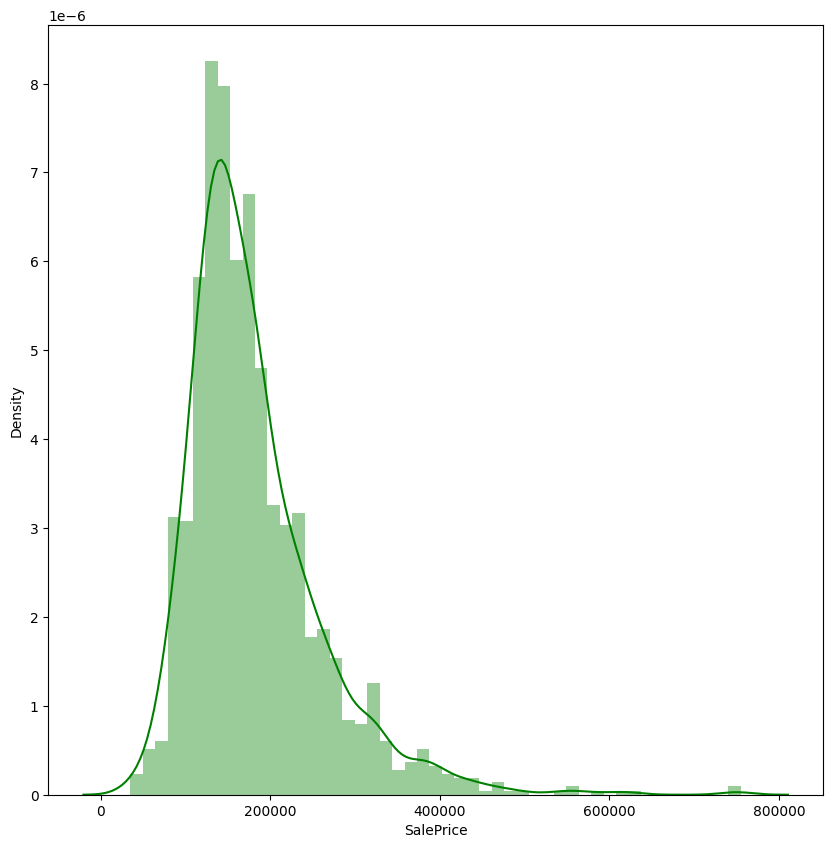

In [111]:
plt.figure(figsize=(10,10))
sns.distplot(dataset['SalePrice'], color='green')

#### SalePrice vs OverallQual

Text(0.5, 1.0, 'Price vs Quality')

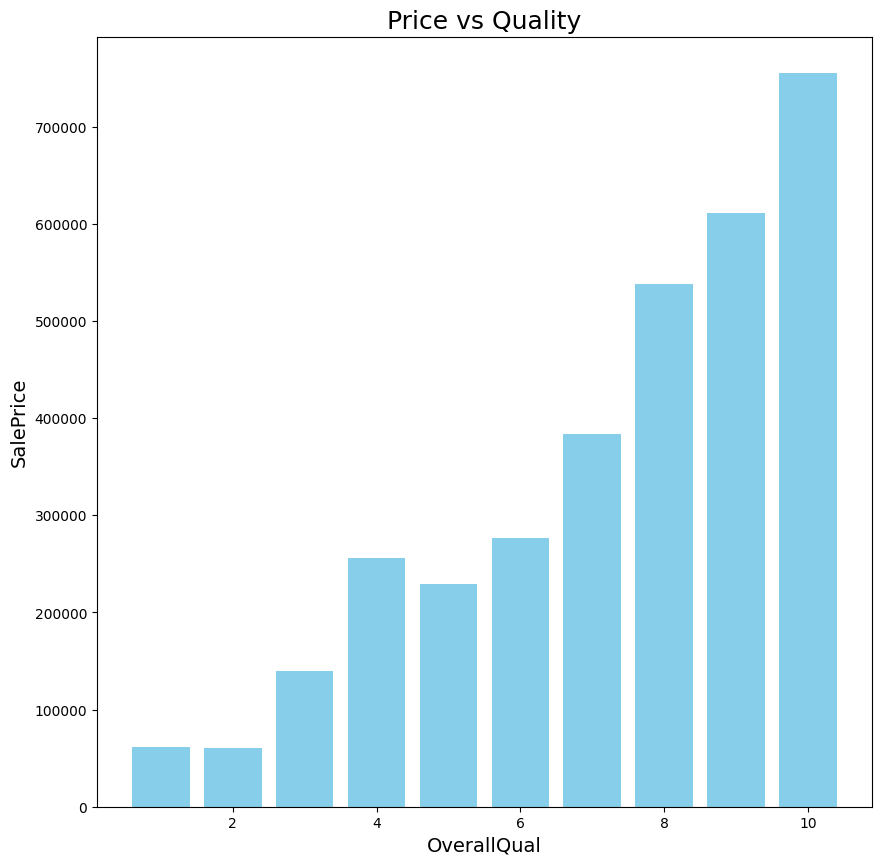

In [116]:
plt.figure(figsize=(10,10))
plt.bar(dataset['OverallQual'], dataset['SalePrice'], color="skyblue")
plt.xlabel("OverallQual", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)
plt.title("Price vs Quality", fontsize=18)

#### SalePrice vs YearBuilt

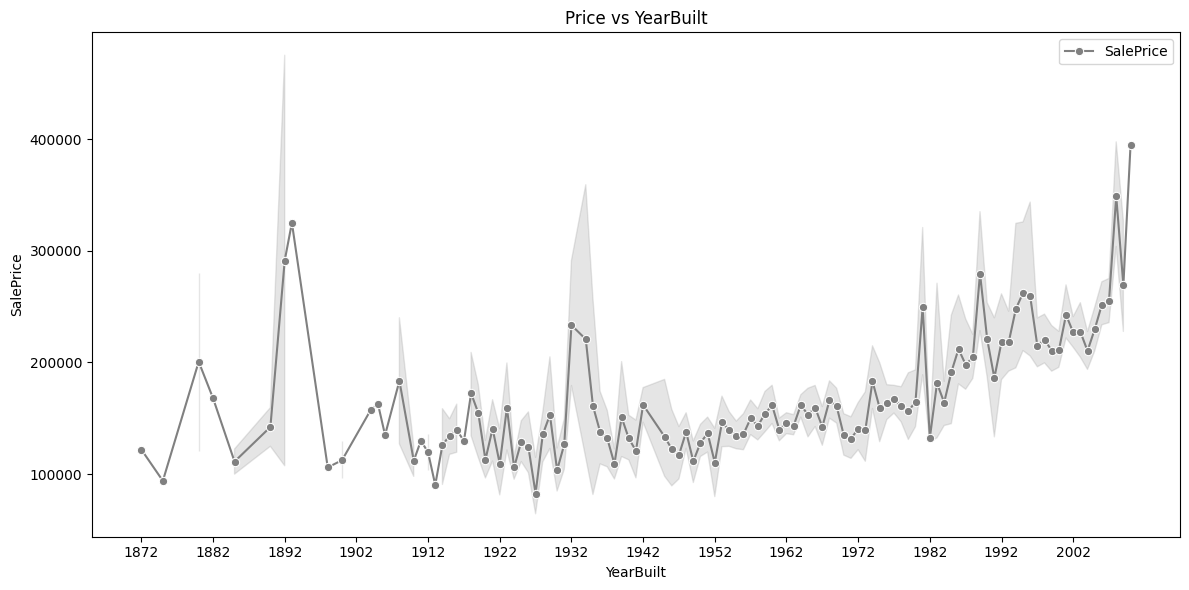

In [124]:
plt.figure(figsize=(12,6))

sns.lineplot(x="YearBuilt", y="SalePrice", data=dataset, label="SalePrice", marker="o", color="grey")

plt.title("Price vs YearBuilt")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")

plt.xticks(range(min(dataset['YearBuilt']), max(dataset['YearBuilt']) + 1, 10))

plt.legend()
plt.tight_layout()
plt.show()

#### SalePrice vs GarageCars

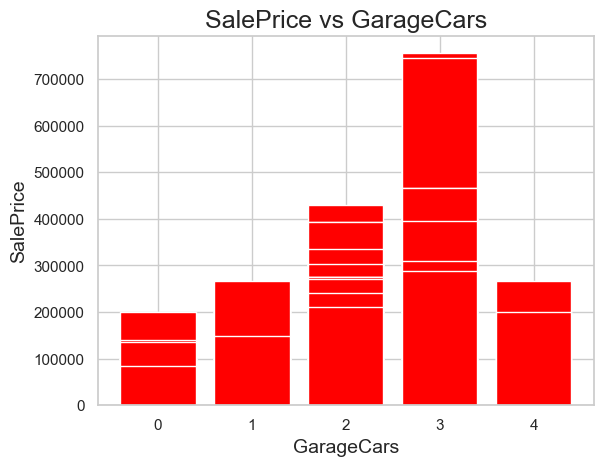

In [134]:
plt.bar(dataset['GarageCars'], dataset['SalePrice'], color='red')

plt.xlabel("GarageCars", fontsize=14)
plt.ylabel("SalePrice", fontsize=14)
plt.title("SalePrice vs GarageCars", fontsize=18)
plt.show()

# Machine Learning

Pre-processing Data

In [135]:
X = dataset.drop("SalePrice", axis=1)
y = dataset['SalePrice']

Splitting Data

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Scaling

In [138]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Model Selection

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

In [146]:
models = {
    "Multiple Linear Regression" : LinearRegression(),
    "Polynomial Regressor" : LinearRegression(),
    "Support Vector Regressor" : SVR(),
    "Decission Tree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor()
}

poly_degree = 2

# Dictionary for cross-validated scores
cv_scores = {}

for model_name, model in models.items():
    if model_name == "Polynomial Regressor":
        poly_features = PolynomialFeatures(degree=poly_degree)
        X_train_poly = poly_features.fit_transform(X_train)

        scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

    else:
        scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

    mse_scores = -scores  # Convert negative MSE scores to positive
    cv_scores[model_name] = mse_scores.mean()

# Find THE BEST model
best_model_name = min(cv_scores, key=cv_scores.get)
best_model = models[best_model_name]

# Train best model on training dataset
if model_name == "Polynomial Regressor":
    poly_features = PolynomialFeatures(degree=poly_degree)
    X_train_poly = poly_features.fit_transform(X_train)
    best_model.fit(X_train_poly, y_train)

else:
    best_model.fit(X_train, y_train)

# Evalute the best model
if best_model_name == "Polynomial Regression":
    X_test_poly = poly_features.transform(X_test)
    y_preds = best_model.predict(X_test_poly)
    
else:
    y_preds = best_model.predict(X_test)

# Calculate Mean Squared Error(MSE) score on Test Data
mse = mean_squared_error(y_test, y_preds)

print(f"Best model: {best_model_name}")
print(f"Mean Squared Error on test data: {mse}")

Best model: Random Forest Regressor
Mean Squared Error on test data: 860337370.8675109


In [147]:
# Dictionary to store the cross-validation scores and test MSE for each model
results = {
    "Model": [],
    "Cross-Validation MSE": [],
    "Test MSE": []
}

for model_name, model in models.items():
    # Cross-validation
    if model_name == "Polynomial Regression":
        poly_features = PolynomialFeatures(degree=poly_degree)
        X_train_poly = poly_features.fit_transform(X_train)
        scores = cross_val_score(model, X_train_poly, y_train, scoring="neg_mean_squared_error", cv=5)
    else:
        scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    
    mse_scores = -scores  
    cv_mse_mean = mse_scores.mean()
    
    if model_name == "Polynomial Regression":
        poly_features = PolynomialFeatures(degree=poly_degree)
        X_train_poly = poly_features.fit_transform(X_train)
        model.fit(X_train_poly, y_train)
        X_test_poly = poly_features.transform(X_test)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    test_mse = mean_squared_error(y_test, y_pred)
    
    # Store the results in the dictionary
    results["Model"].append(model_name)
    results["Cross-Validation MSE"].append(cv_mse_mean)
    results["Test MSE"].append(test_mse)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)

                        Model  Cross-Validation MSE      Test MSE
0  Multiple Linear Regression          1.220643e+35  3.357757e+29
1        Polynomial Regressor          1.220643e+35  3.357757e+29
2    Support Vector Regressor          6.242792e+09  7.858248e+09
3    Decission Tree Regressor          2.369454e+09  1.512367e+09
4     Random Forest Regressor          9.611445e+08  8.593710e+08


## Training Random Forest Regressor
As it gave the best accuracy

In [148]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

Predicting the test results

In [149]:
y_preds = regressor.predict(X_test)

Visualizing the Random Forest Regressor

Text(0.5, 1.0, 'Random Forest Regressor')

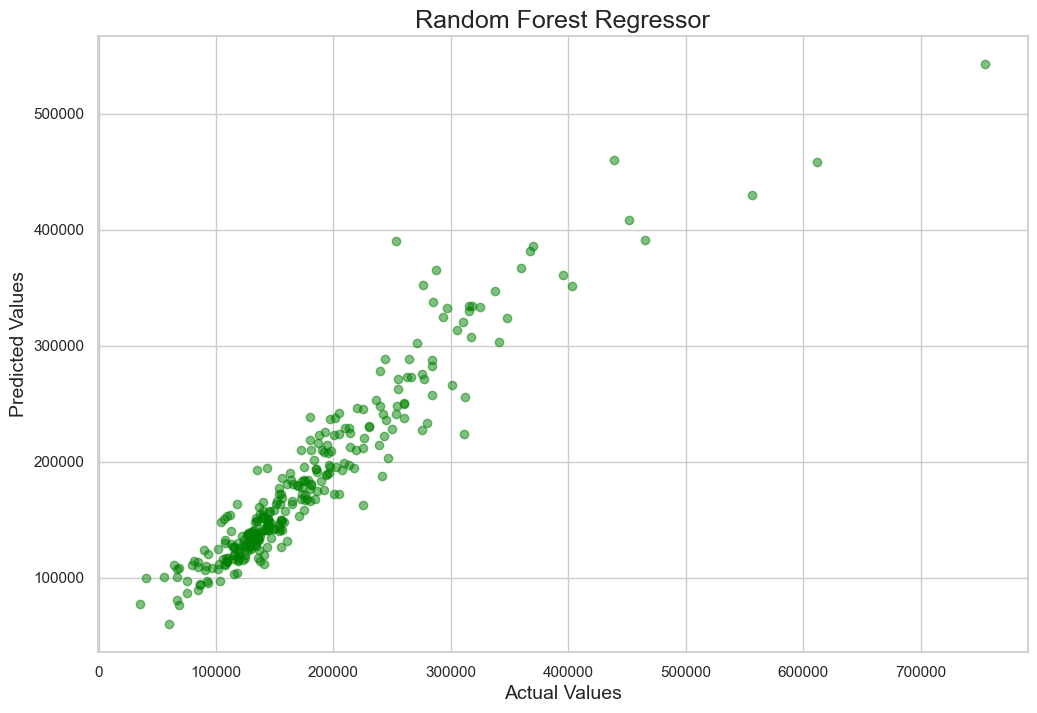

In [164]:
plt.figure(figsize=(12,8))
plt.scatter(y_test, y_pred, color="green", alpha=0.5)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Random Forest Regressor", fontsize=18)

# Evaluating the model

In [165]:
r2_score(y_test, y_preds)

0.8768502270394937